# 인공지능 과제2
## 모든 문제가 코드제출이 필요한 문제이니, 코드를 Assignment.zip 파일로 압축하여 따로 제출하세요. (단, 코드 파일명은 Assignment-문제번호.py 로 할 것)

## 문제에서 요구하는 이미지 및 결과는 코드 실행 결과를 캡처해서 각 문제 아래에 반드시 첨부해주세요. (코드만 제출 시 감점)

### +1, 2, 3, 4, 6번 학습 시 epoch 값을 해당 예제에 있는 epoch값을 적용하세요.


In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/AI/assignment')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 01.   
## 6-2.py는 compile 함수에서 손실함수로 categorical_crossentropy와 옵티마이저로 Adam을 사용한다. 
## 이들을 각각 MSE와 SGD로 바꾸어 학습을 수행하여 성능을 비교하고, 각각의 정확률, 정확률 그래프, 손실 함수 그래프를 첨부하시오.

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/12
469/469 - 15s - loss: 0.2365 - accuracy: 0.9289 - val_loss: 0.0487 - val_accuracy: 0.9848 - 15s/epoch - 33ms/step
Epoch 2/12
469/469 - 3s - loss: 0.0824 - accuracy: 0.9756 - val_loss: 0.0350 - val_accuracy: 0.9879 - 3s/epoch - 7ms/step
Epoch 3/12
469/469 - 3s - loss: 0.0608 - accuracy: 0.9815 - val_loss: 0.0346 - val_accuracy: 0.9887 - 3s/epoch - 7ms/step
Epoch 4/12
469/469 - 4s - loss: 0.0528 - accuracy: 0.9839 - val_loss: 0.0283 - val_accuracy: 0.9911 - 4s/epoch - 8ms/step
Epoch 5/12
469/469 - 4s - loss: 0.0447 - accuracy: 0.9865 - val_loss: 0.0288 - val_accuracy: 0.9902 - 4s/epoch - 8ms/step
Epoch 6/12
469/469 - 3s - loss: 0.0386 - accuracy: 0.9876 - val_loss: 0.0263 - val_accuracy: 0.9922 - 3s/epoch - 7ms/step
Epoch 7/12
469/469 - 3s - loss: 0.0353 - accuracy: 0.9890 - val_loss: 0.0255 - val_accuracy: 0.9922 - 3s/epoch - 7ms/step
Epoch 8/12
469/469 - 4s - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.0274 -

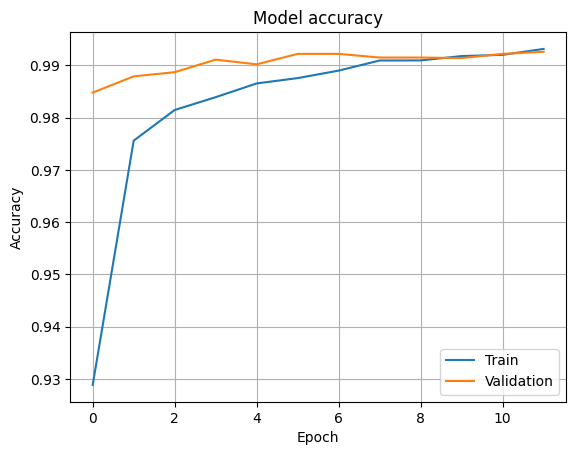

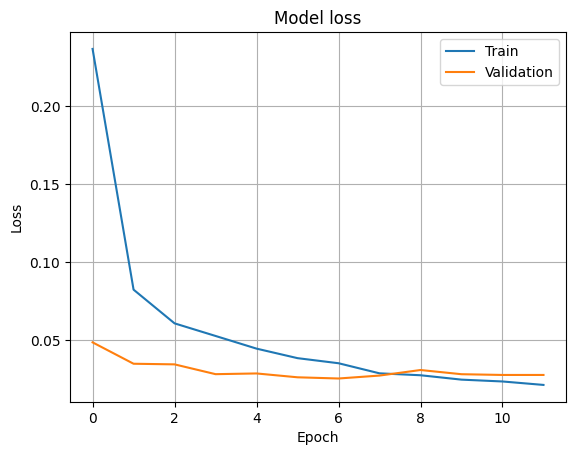

Epoch 1/12
469/469 - 5s - loss: 9.7702e-04 - accuracy: 0.9935 - val_loss: 0.0012 - val_accuracy: 0.9931 - 5s/epoch - 10ms/step
Epoch 2/12
469/469 - 3s - loss: 8.6219e-04 - accuracy: 0.9943 - val_loss: 0.0012 - val_accuracy: 0.9930 - 3s/epoch - 7ms/step
Epoch 3/12
469/469 - 4s - loss: 9.0657e-04 - accuracy: 0.9940 - val_loss: 0.0011 - val_accuracy: 0.9932 - 4s/epoch - 8ms/step
Epoch 4/12
469/469 - 4s - loss: 8.6056e-04 - accuracy: 0.9945 - val_loss: 0.0011 - val_accuracy: 0.9934 - 4s/epoch - 8ms/step
Epoch 5/12
469/469 - 4s - loss: 8.3189e-04 - accuracy: 0.9945 - val_loss: 0.0011 - val_accuracy: 0.9933 - 4s/epoch - 8ms/step
Epoch 6/12
469/469 - 4s - loss: 8.5314e-04 - accuracy: 0.9944 - val_loss: 0.0011 - val_accuracy: 0.9931 - 4s/epoch - 8ms/step
Epoch 7/12
469/469 - 4s - loss: 8.3178e-04 - accuracy: 0.9945 - val_loss: 0.0011 - val_accuracy: 0.9931 - 4s/epoch - 8ms/step
Epoch 8/12
469/469 - 3s - loss: 8.6717e-04 - accuracy: 0.9943 - val_loss: 0.0011 - val_accuracy: 0.9932 - 3s/epoch - 

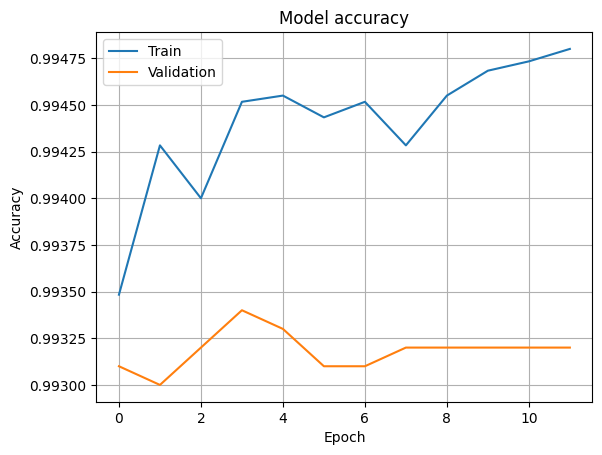

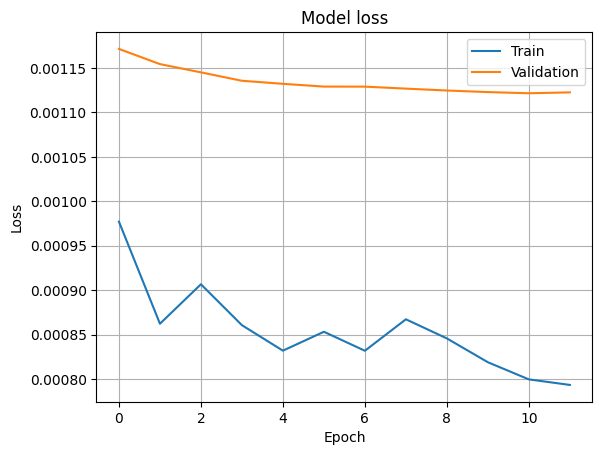

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam,SGD

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)


# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

def complie(loss_fun,opt):   
    # 신경망 모델 학습
    cnn.compile(loss=loss_fun,optimizer=opt,metrics=['accuracy'])
    hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

    # 신경망 모델 정확률 평가
    res=cnn.evaluate(x_test,y_test,verbose=0)
   
    
    print("손실함수: %s 옵티마이저: %s"%(loss_fun,opt.name))
    print("정확률은",res[1]*100)

    import matplotlib.pyplot as plt

    # 정확률 그래프
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'], loc='best')
    plt.grid()
    plt.show()

    # 손실 함수 그래프
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'], loc='best')
    plt.grid()
    plt.show()

complie('categorical_crossentropy',Adam())
complie('mse',SGD())

#02   
## 6-2.py는 활성 함수로 ReLU를 사용한다.   
## 19, 20, 24행에서 relu를 sigmoid로 변경해 성능을 비교하고, 
## 각각의 정확률, 정확률 그래프, 손실 함수 그래프를 첨부하시오.

Epoch 1/12
469/469 - 6s - loss: 0.2404 - accuracy: 0.9269 - val_loss: 0.0567 - val_accuracy: 0.9816 - 6s/epoch - 13ms/step
Epoch 2/12
469/469 - 4s - loss: 0.0836 - accuracy: 0.9746 - val_loss: 0.0360 - val_accuracy: 0.9877 - 4s/epoch - 8ms/step
Epoch 3/12
469/469 - 4s - loss: 0.0612 - accuracy: 0.9816 - val_loss: 0.0341 - val_accuracy: 0.9880 - 4s/epoch - 8ms/step
Epoch 4/12
469/469 - 4s - loss: 0.0500 - accuracy: 0.9840 - val_loss: 0.0306 - val_accuracy: 0.9893 - 4s/epoch - 9ms/step
Epoch 5/12
469/469 - 4s - loss: 0.0437 - accuracy: 0.9862 - val_loss: 0.0299 - val_accuracy: 0.9902 - 4s/epoch - 8ms/step
Epoch 6/12
469/469 - 4s - loss: 0.0393 - accuracy: 0.9877 - val_loss: 0.0283 - val_accuracy: 0.9914 - 4s/epoch - 9ms/step
Epoch 7/12
469/469 - 6s - loss: 0.0323 - accuracy: 0.9899 - val_loss: 0.0296 - val_accuracy: 0.9907 - 6s/epoch - 12ms/step
Epoch 8/12
469/469 - 5s - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.0263 - val_accuracy: 0.9925 - 5s/epoch - 11ms/step
Epoch 9/12
469/469 - 

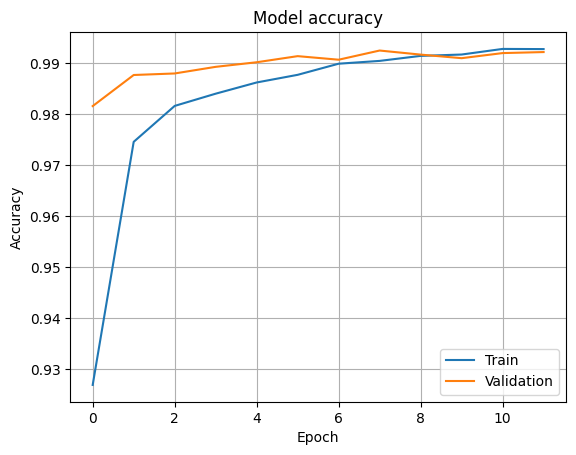

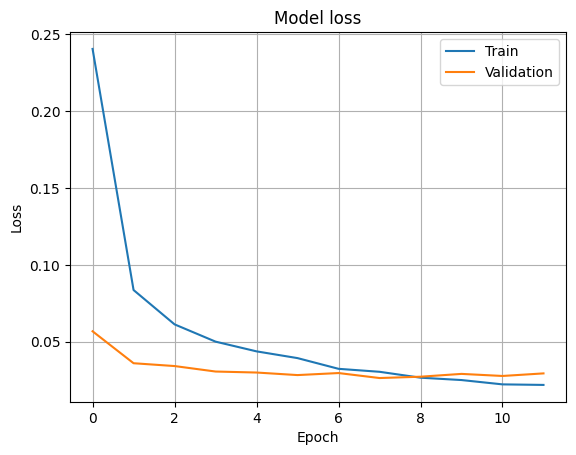

Epoch 1/12
469/469 - 6s - loss: 2.0532 - accuracy: 0.2641 - val_loss: 0.5525 - val_accuracy: 0.8615 - 6s/epoch - 13ms/step
Epoch 2/12
469/469 - 4s - loss: 0.5520 - accuracy: 0.8420 - val_loss: 0.3447 - val_accuracy: 0.9074 - 4s/epoch - 9ms/step
Epoch 3/12
469/469 - 4s - loss: 0.4306 - accuracy: 0.8745 - val_loss: 0.2568 - val_accuracy: 0.9239 - 4s/epoch - 9ms/step
Epoch 4/12
469/469 - 4s - loss: 0.3410 - accuracy: 0.9017 - val_loss: 0.1965 - val_accuracy: 0.9423 - 4s/epoch - 9ms/step
Epoch 5/12
469/469 - 4s - loss: 0.2554 - accuracy: 0.9279 - val_loss: 0.1345 - val_accuracy: 0.9602 - 4s/epoch - 9ms/step
Epoch 6/12
469/469 - 4s - loss: 0.1893 - accuracy: 0.9466 - val_loss: 0.0961 - val_accuracy: 0.9720 - 4s/epoch - 9ms/step
Epoch 7/12
469/469 - 4s - loss: 0.1435 - accuracy: 0.9588 - val_loss: 0.0784 - val_accuracy: 0.9763 - 4s/epoch - 9ms/step
Epoch 8/12
469/469 - 4s - loss: 0.1187 - accuracy: 0.9661 - val_loss: 0.0670 - val_accuracy: 0.9783 - 4s/epoch - 9ms/step
Epoch 9/12
469/469 - 4s

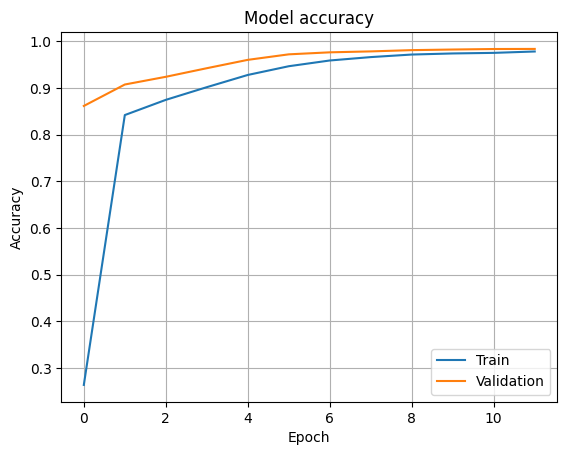

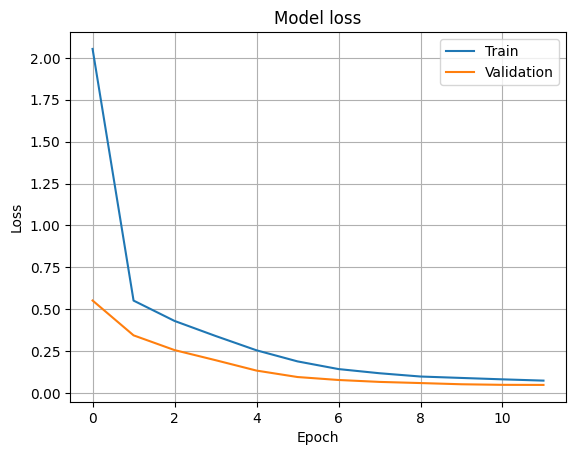

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

def bulid(act):
    # 신경망 모델 설계
    cnn=Sequential()
    cnn.add(Conv2D(32,(3,3),activation=act,input_shape=(28,28,1)))
    cnn.add(Conv2D(64,(3,3),activation=act))
    cnn.add(MaxPooling2D(pool_size=(2,2)))
    cnn.add(Dropout(0.25))
    cnn.add(Flatten())
    cnn.add(Dense(128,activation=act))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(10,activation='softmax'))

    # 신경망 모델 학습
    cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
    hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

    # 신경망 모델 정확률 평가
    res=cnn.evaluate(x_test,y_test,verbose=0)
    print("활성함수: %s" %act)
    print("정확률은",res[1]*100)

    import matplotlib.pyplot as plt

    # 정확률 그래프
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'], loc='best')
    plt.grid()
    plt.show()

    # 손실 함수 그래프
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'], loc='best')
    plt.grid()
    plt.show()

bulid("relu")
bulid("sigmoid")

#03
## 6-4.py는 1순위 정확률을 출력한다. 
## 1순위 정확률과 5순위 정확률을 같이 출력하도록 프로그램을 확장하고, 
## 1순위 정확률과 5순위 정확률을 각각 첨부하시오.

170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/30
391/391 - 17s - loss: 1.6684 - accuracy: 0.3813 - top_k_categorical_accuracy: 0.8667 - val_loss: 1.3489 - val_accuracy: 0.5145 - val_top_k_categorical_accuracy: 0.9350 - 17s/epoch - 45ms/step
Epoch 2/30
391/391 - 4s - loss: 1.2760 - accuracy: 0.5405 - top_k_categorical_accuracy: 0.9440 - val_loss: 1.1524 - val_accuracy: 0.5889 - val_top_k_categorical_accuracy: 0.9529 - 4s/epoch - 11ms/step
Epoch 3/30
391/391 - 4s - loss: 1.1010 - accuracy: 0.6102 - top_k_categorical_accuracy: 0.9598 - val_loss: 0.9713 - val_accuracy: 0.6627 - val_top_k_categorical_accuracy: 0.9704 - 4s/epoch - 11ms/step
Epoch 4/30
391/391 - 4s - loss: 0.9937 - accuracy: 0.6516 - top_k_categorical_accuracy: 0.9675 - val_loss: 0.8997 - val_accuracy: 0.6851 - val_top_k_categorical_accuracy: 0.9740 - 4s/epoch - 10ms/step
Epoch 5/30
391/391 - 4s - loss: 0.9042 - accuracy: 0.6821 - top_k_categorical_accuracy: 0.9745 - val_loss: 0.8201 - val_accurac

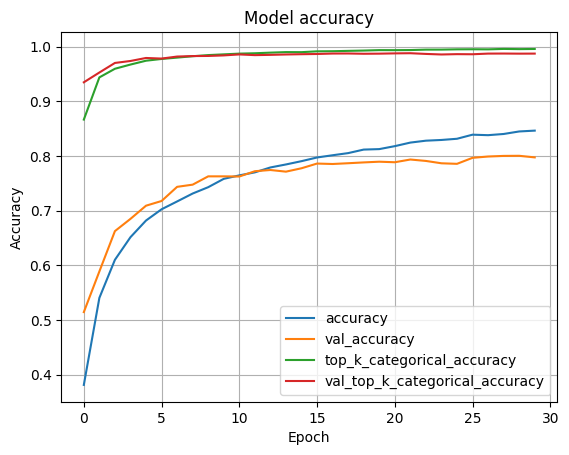

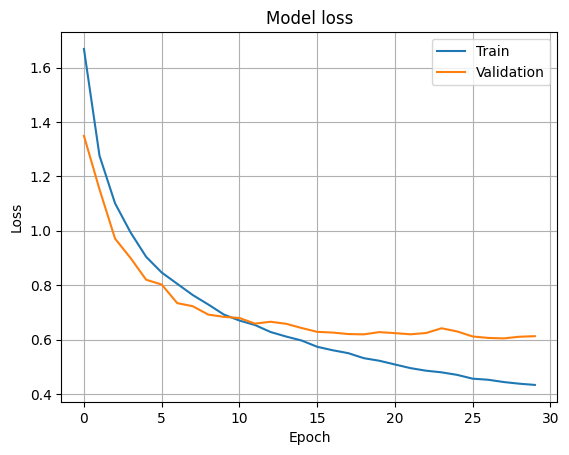

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10,mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

 # 신경망 모델 학습
    
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy','TopKCategoricalAccuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("1순위 정확률은",res[1]*100)
print("5순위 정확률은",res[2]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['top_k_categorical_accuracy'])
plt.plot(hist.history['val_top_k_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy','top_k_categorical_accuracy','val_top_k_categorical_accuracy'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()



#04
## 6-6.py의 시각화 기능을 MNIST 데이터셋에 적용하시오. 
## 프로그램 실행 결과로 얻은 커널과 특징 맵 이미지를 첨부하시오.

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/30
469/469 - 16s - loss: 0.2466 - accuracy: 0.9260 - val_loss: 0.0563 - val_accuracy: 0.9809 - 16s/epoch - 34ms/step
Epoch 2/30
469/469 - 4s - loss: 0.0857 - accuracy: 0.9748 - val_loss: 0.0392 - val_accuracy: 0.9866 - 4s/epoch - 8ms/step
Epoch 3/30
469/469 - 4s - loss: 0.0655 - accuracy: 0.9799 - val_loss: 0.0336 - val_accuracy: 0.9897 - 4s/epoch - 8ms/step
Epoch 4/30
469/469 - 4s - loss: 0.0524 - accuracy: 0.9840 - val_loss: 0.0315 - val_accuracy: 0.9899 - 4s/epoch - 8ms/step
Epoch 5/30
469/469 - 4s - loss: 0.0448 - accuracy: 0.9860 - val_loss: 0.0308 - val_accuracy: 0.9891 - 4s/epoch - 8ms/step
Epoch 6/30
469/469 - 4s - loss: 0.0391 - accuracy: 0.9876 - val_loss: 0.0296 - val_accuracy: 0.9903 - 4s/epoch - 8ms/step
Epoch 7/30
469/469 - 4s - loss: 0.0351 - accuracy: 0.9890 - val_loss: 0.0291 - val_accuracy: 0.9897 - 4s/epoch - 8ms/step
Epoch 8/30
469/469 - 4s - loss: 0.0311 - accuracy: 0.9901 - val_loss: 0.0272 -

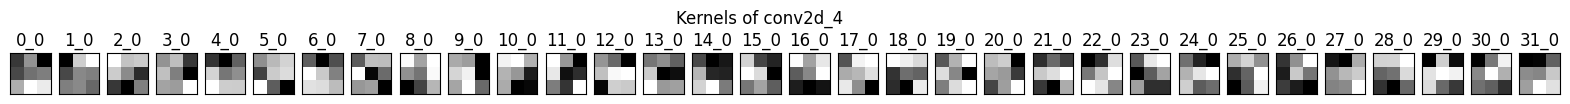

conv2d (None, 26, 26, 32)
conv2d_1 (None, 24, 24, 64)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 1ms/step


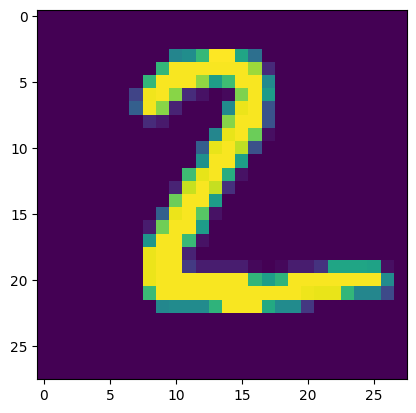

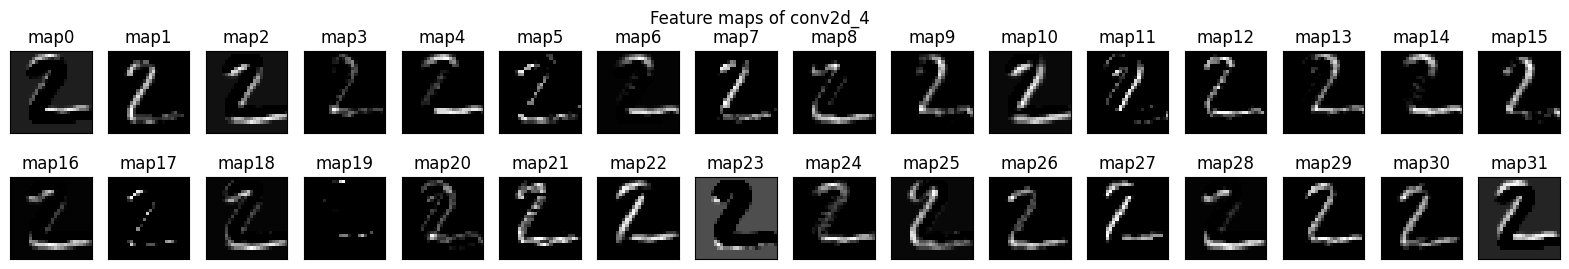

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

cnn.summary() # cnn 모델의 정보 출력

for layer in cnn.layers: # 컨볼루션층의 커널을 시각화
    if 'conv' in layer.name:
        kernel,biases=layer.get_weights()
        print(layer.name,kernel.shape) # 커널의 텐서 모양을 출력

kernel,biases=cnn.layers[0].get_weights() # 층 0의 커널 정보를 저장
minv,maxv=kernel.min(),kernel.max()
kernel=(kernel-minv)/(maxv-minv)
n_kernel=32

import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
plt.suptitle("Kernels of conv2d_4")
for i in range(n_kernel): # i번째 커널
    f=kernel[:,:,:,i]
    for j in range(1): # j번째 채널
        plt.subplot(3,n_kernel,j*n_kernel+i+1)
        plt.imshow(f[:,:,j],cmap='gray')
        plt.xticks([]); plt.yticks([])
        plt.title(str(i)+'_'+str(j))
plt.show()

for layer in cnn.layers: # 컨볼루션층의 특징 맵을 시각화
    if 'conv' in layer.name:
        print(layer.name,layer.output.shape) # 특징 맵의 텐서 모양을 출력

from tensorflow.keras.models import Model

partial_model=Model(inputs=cnn.inputs,outputs=cnn.layers[0].output) # 층 0만 떼어냄
partial_model.summary()

feature_map=partial_model.predict(x_test) # 부분 모델로 테스트 집합을 예측
fm=feature_map[1] # 1번 영상의 특징 맵을 시각화

plt.imshow(x_test[1]) # 1번 영상을 출력

plt.figure(figsize=(20,3))
plt.suptitle("Feature maps of conv2d_4")
for i in range(32): # i번째 특징 맵
    plt.subplot(2,16,i+1)
    plt.imshow(fm[:,:,i],cmap='gray')
    plt.xticks([]); plt.yticks([])
    plt.title("map"+str(i))
plt.show()

#05
## 8-3.py의 36행에서 units을 16, 32, 64, 128, 256으로 변화시키며 학습 및 평가를 수행하고, 
## 각 unit 수의 변화에 따른 평균절댓값백분율오차(MAPE) 결과를 첨부하시오.


(358, 7, 4) (358, 4)
[[3772.93633533 3796.63728431 3824.16587937 3666.52401643]
 [3799.67854295 3773.44146075 3879.23118467 3753.80002246]
 [3811.61197937 3799.36702601 3840.04482307 3788.91849833]
 [3804.41917011 3806.69151279 3819.19435612 3759.40921647]
 [3782.66410112 3807.84575592 3818.69548135 3766.24204823]
 [3689.86289319 3783.35506344 3804.35361623 3663.47774336]
 [3832.08088473 3701.04987103 3866.71870424 3688.69715385]] [3848.95636968 3832.59242908 3881.96576977 3802.51605364]
Epoch 1/100
250/250 - 4s - loss: 2551.9358 - mae: 2551.9358 - val_loss: 268.6382 - val_mae: 268.6382 - 4s/epoch - 18ms/step
Epoch 2/100
250/250 - 1s - loss: 395.0989 - mae: 395.0989 - val_loss: 253.9108 - val_mae: 253.9108 - 1s/epoch - 6ms/step
Epoch 3/100
250/250 - 1s - loss: 390.0396 - mae: 390.0396 - val_loss: 250.3253 - val_mae: 250.3253 - 1s/epoch - 6ms/step
Epoch 4/100
250/250 - 1s - loss: 383.8536 - mae: 383.8536 - val_loss: 378.3812 - val_mae: 378.3812 - 1s/epoch - 5ms/step
Epoch 5/100
250/250 

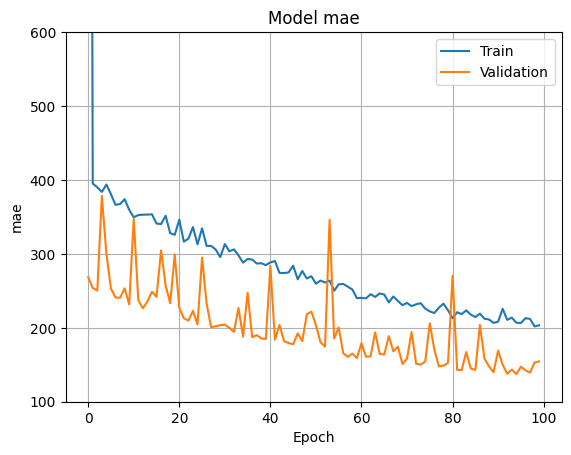

Epoch 1/100
250/250 - 4s - loss: 3204.3569 - mae: 3204.3569 - val_loss: 409.7640 - val_mae: 409.7640 - 4s/epoch - 16ms/step
Epoch 2/100
250/250 - 1s - loss: 567.0374 - mae: 567.0374 - val_loss: 356.3145 - val_mae: 356.3145 - 1s/epoch - 6ms/step
Epoch 3/100
250/250 - 1s - loss: 510.4569 - mae: 510.4569 - val_loss: 364.1799 - val_mae: 364.1799 - 1s/epoch - 5ms/step
Epoch 4/100
250/250 - 1s - loss: 511.2652 - mae: 511.2652 - val_loss: 354.4024 - val_mae: 354.4024 - 1s/epoch - 5ms/step
Epoch 5/100
250/250 - 1s - loss: 543.2040 - mae: 543.2040 - val_loss: 348.7725 - val_mae: 348.7725 - 1s/epoch - 6ms/step
Epoch 6/100
250/250 - 1s - loss: 521.5057 - mae: 521.5057 - val_loss: 350.6733 - val_mae: 350.6733 - 1s/epoch - 6ms/step
Epoch 7/100
250/250 - 1s - loss: 493.1331 - mae: 493.1331 - val_loss: 358.3159 - val_mae: 358.3159 - 1s/epoch - 6ms/step
Epoch 8/100
250/250 - 2s - loss: 493.1188 - mae: 493.1188 - val_loss: 352.4620 - val_mae: 352.4620 - 2s/epoch - 8ms/step
Epoch 9/100
250/250 - 2s - lo

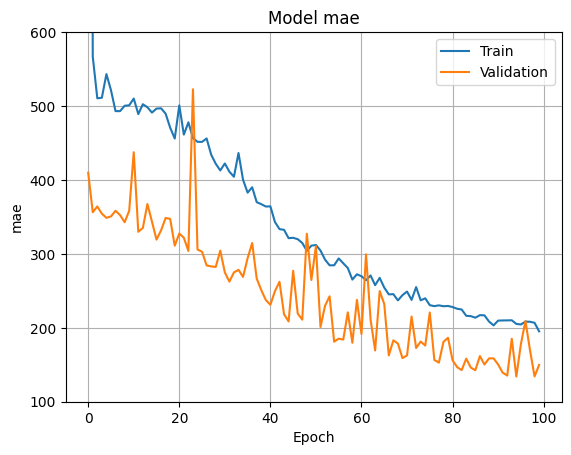

Epoch 1/100
250/250 - 4s - loss: 3232.5454 - mae: 3232.5454 - val_loss: 338.1858 - val_mae: 338.1858 - 4s/epoch - 15ms/step
Epoch 2/100
250/250 - 2s - loss: 760.9564 - mae: 760.9564 - val_loss: 311.6283 - val_mae: 311.6283 - 2s/epoch - 7ms/step
Epoch 3/100
250/250 - 1s - loss: 442.4997 - mae: 442.4997 - val_loss: 339.2131 - val_mae: 339.2131 - 1s/epoch - 5ms/step
Epoch 4/100
250/250 - 1s - loss: 442.3989 - mae: 442.3989 - val_loss: 458.8237 - val_mae: 458.8237 - 1s/epoch - 6ms/step
Epoch 5/100
250/250 - 1s - loss: 431.3654 - mae: 431.3654 - val_loss: 505.2898 - val_mae: 505.2898 - 1s/epoch - 5ms/step
Epoch 6/100
250/250 - 1s - loss: 449.1257 - mae: 449.1257 - val_loss: 269.4539 - val_mae: 269.4539 - 1s/epoch - 6ms/step
Epoch 7/100
250/250 - 1s - loss: 406.0175 - mae: 406.0175 - val_loss: 257.1890 - val_mae: 257.1890 - 1s/epoch - 5ms/step
Epoch 8/100
250/250 - 1s - loss: 416.1781 - mae: 416.1781 - val_loss: 265.8622 - val_mae: 265.8622 - 1s/epoch - 5ms/step
Epoch 9/100
250/250 - 2s - lo

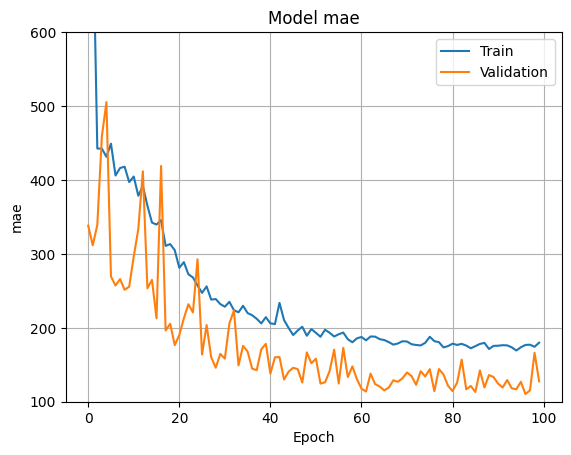

Epoch 1/100
250/250 - 3s - loss: 1427.0142 - mae: 1427.0142 - val_loss: 422.6951 - val_mae: 422.6951 - 3s/epoch - 12ms/step
Epoch 2/100
250/250 - 2s - loss: 566.9844 - mae: 566.9844 - val_loss: 533.1741 - val_mae: 533.1741 - 2s/epoch - 7ms/step
Epoch 3/100
250/250 - 2s - loss: 525.9775 - mae: 525.9775 - val_loss: 319.3894 - val_mae: 319.3894 - 2s/epoch - 8ms/step
Epoch 4/100
250/250 - 2s - loss: 551.9802 - mae: 551.9802 - val_loss: 683.8047 - val_mae: 683.8047 - 2s/epoch - 6ms/step
Epoch 5/100
250/250 - 1s - loss: 486.5193 - mae: 486.5193 - val_loss: 564.8997 - val_mae: 564.8997 - 1s/epoch - 6ms/step
Epoch 6/100
250/250 - 1s - loss: 525.5173 - mae: 525.5173 - val_loss: 418.6030 - val_mae: 418.6030 - 1s/epoch - 5ms/step
Epoch 7/100
250/250 - 1s - loss: 467.1512 - mae: 467.1512 - val_loss: 523.3618 - val_mae: 523.3618 - 1s/epoch - 5ms/step
Epoch 8/100
250/250 - 1s - loss: 429.3547 - mae: 429.3547 - val_loss: 437.2918 - val_mae: 437.2918 - 1s/epoch - 5ms/step
Epoch 9/100
250/250 - 1s - lo

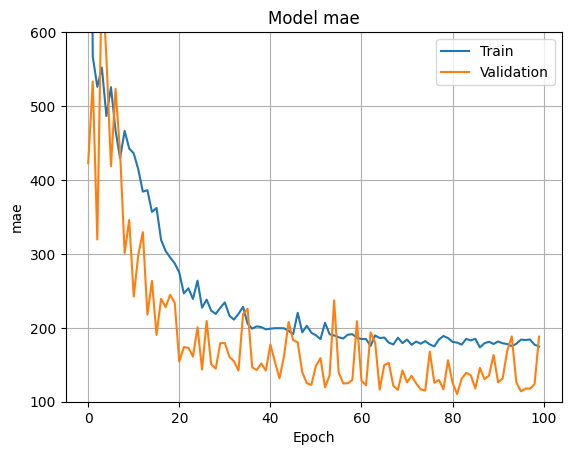

Epoch 1/100
250/250 - 3s - loss: 910.1400 - mae: 910.1400 - val_loss: 416.9185 - val_mae: 416.9185 - 3s/epoch - 12ms/step
Epoch 2/100
250/250 - 1s - loss: 575.5272 - mae: 575.5272 - val_loss: 453.3668 - val_mae: 453.3668 - 1s/epoch - 6ms/step
Epoch 3/100
250/250 - 1s - loss: 553.8071 - mae: 553.8071 - val_loss: 344.2623 - val_mae: 344.2623 - 1s/epoch - 6ms/step
Epoch 4/100
250/250 - 1s - loss: 546.3454 - mae: 546.3454 - val_loss: 433.1892 - val_mae: 433.1892 - 1s/epoch - 6ms/step
Epoch 5/100
250/250 - 2s - loss: 497.5484 - mae: 497.5484 - val_loss: 352.9680 - val_mae: 352.9680 - 2s/epoch - 9ms/step
Epoch 6/100
250/250 - 2s - loss: 512.9686 - mae: 512.9686 - val_loss: 468.4819 - val_mae: 468.4819 - 2s/epoch - 7ms/step
Epoch 7/100
250/250 - 1s - loss: 500.9501 - mae: 500.9501 - val_loss: 315.8008 - val_mae: 315.8008 - 1s/epoch - 6ms/step
Epoch 8/100
250/250 - 1s - loss: 489.8505 - mae: 489.8505 - val_loss: 312.7705 - val_mae: 312.7705 - 1s/epoch - 6ms/step
Epoch 9/100
250/250 - 1s - loss

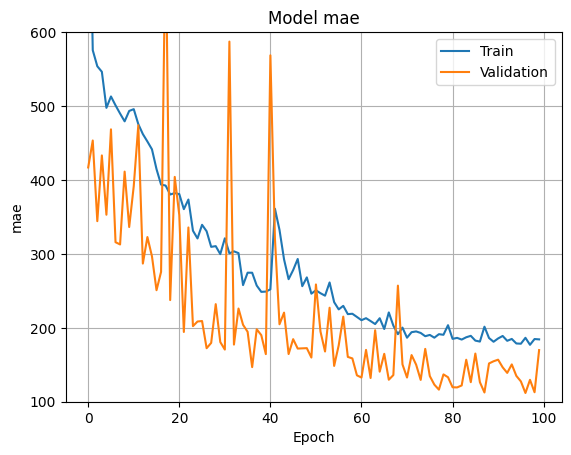

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 코인데스크 사이트에서 1년치 비트코인 가격 데이터 읽기
f=open("BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv","r")
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)','24h Open (USD)','24h High (USD)','24h Low (USD)']].to_numpy() # 종가, 시가, 고가, 저가를 모두 취함

# 시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=7 # 윈도우 크기
h=1 # 수평선 계수

X,Y = seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# 훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

def bulid(n):
    # LSTM 모델의 설계와 학습
    model = Sequential()
    model.add(LSTM(units=n,activation='relu',input_shape=x_train[0].shape))
    model.add(Dense(4))
    model.compile(loss='mae',optimizer='adam',metrics=['mae'])
    hist=model.fit(x_train,y_train,epochs=100,batch_size=1,validation_data=(x_test,y_test),verbose=2)

    # LSTM 모델 평가
    ev=model.evaluate(x_test,y_test,verbose=0)
   
    print("손실 함수:",ev[0],"MAE:",ev[1])

    # LSTM 모델로 예측 수행
    pred=model.predict(x_test) # LSTM
    print("unit: ",n)
    print("LSTM 평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

    # 학습 곡선
    plt.plot(hist.history['mae'])
    plt.plot(hist.history['val_mae'])
    plt.title('Model mae')
    plt.ylabel('mae')
    plt.xlabel('Epoch')
    plt.ylim([100,600])
    plt.legend(['Train','Validation'], loc='best')
    plt.grid()
    plt.show()

for i in range(0,5):
     bulid(16*2**i)

#06
## 8-7.py에 조기 멈춤을 적용하고 적용하지 않았을 때의 성능을 비교하고, 
## 각각의 정확률과 정확률 그래프를 첨부하시오.
### (from tensorflow.keras.callbacks import EarlyStopping) 사용할 것



(25000,) (25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
the/and/a/of/to/is/br/in/it/i/this/that/wa

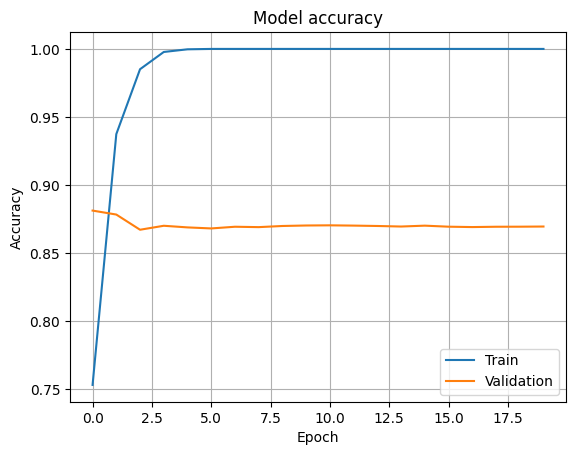


Epoch 1/20
391/391 - 42s - loss: 0.4664 - accuracy: 0.7486 - val_loss: 0.2823 - val_accuracy: 0.8804 - 42s/epoch - 107ms/step
Epoch 2/20
391/391 - 23s - loss: 0.1724 - accuracy: 0.9370 - val_loss: 0.3085 - val_accuracy: 0.8717 - 23s/epoch - 58ms/step
Epoch 3/20
391/391 - 16s - loss: 0.0660 - accuracy: 0.9810 - val_loss: 0.3722 - val_accuracy: 0.8671 - 16s/epoch - 40ms/step
Epoch 4/20
391/391 - 11s - loss: 0.0169 - accuracy: 0.9974 - val_loss: 0.4288 - val_accuracy: 0.8650 - 11s/epoch - 27ms/step
Epoch 5/20
391/391 - 9s - loss: 0.0042 - accuracy: 0.9998 - val_loss: 0.4924 - val_accuracy: 0.8647 - 9s/epoch - 22ms/step
Epoch 6/20
391/391 - 6s - loss: 0.0017 - accuracy: 0.9999 - val_loss: 0.5256 - val_accuracy: 0.8652 - 6s/epoch - 16ms/step
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 512, 16)           160000    
                               

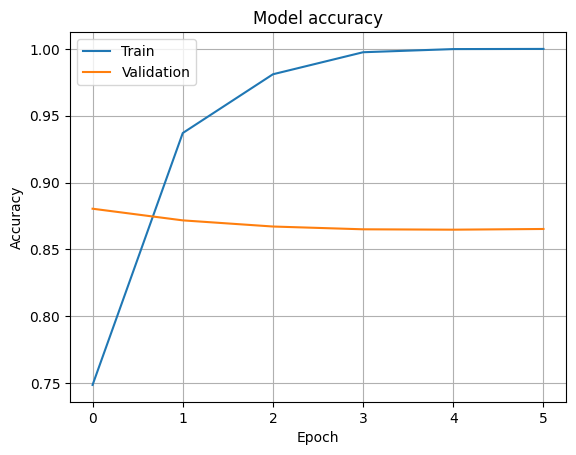

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras import preprocessing
from tensorflow.keras.callbacks import EarlyStopping

dic_siz=10000 # 사전의 크기(사전에 있는 단어 개수)
sample_siz=512 # 샘플의 크기

# tensorflow가 제공하는 간소한 버전의 IMDB 읽기
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=dic_siz)
print(x_train.shape,x_test.shape)
print(x_train[0])

# 단어를 숫자, 숫자를 단어로 변환하는데 쓰는 표(표는 딕셔너리로 구현)
word2id=imdb.get_word_index()
id2word={word:id for id,word in word2id.items()}

for i in range(1,21):
    print(id2word[i],end='/')
    
embed_space_dim=16 # 16차원의 임베딩 공간

x_train=preprocessing.sequence.pad_sequences(x_train,maxlen=sample_siz)
x_test=preprocessing.sequence.pad_sequences(x_test,maxlen=sample_siz)

def build(isearly):
    
    # 신경망 모델 설계와 학습
    embed=Sequential()
    embed.add(Embedding(input_dim=dic_siz,output_dim=embed_space_dim,input_length=sample_siz))
    embed.add(Flatten())
    embed.add(Dense(32,activation='relu'))
    embed.add(Dense(1,activation='sigmoid'))
    embed.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
    if(isearly):
        early=EarlyStopping(monitor='val_accuracy',patience=5,restore_best_weights=True)
        print()
        hist=embed.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test),verbose=2,callbacks=[early])
    else:
        print()
        hist=embed.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test),verbose=2)

    embed.summary()

    # 모델 평가
    res=embed.evaluate(x_test,y_test,verbose=0)
    if(isearly):
        print("조기멈춤 적용")
    else:
        print("조기멈춤 미적용")
    print("정확률은",res[1]*100)

    import matplotlib.pyplot as plt

    # 학습 곡선
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'], loc='best')
    plt.grid()
    plt.show()


build(False)
build(True)


#07
## 8-8.py에 교차 검증을 적용해 보다 신뢰성 높은 성능을 제시하시오. (k=3) 
## 교차 검증으로 측정한 정확률을 첨부하시오.
### +7번 학습 시 epoch 값을 5으로 낮춰 적용하세요.


In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras import preprocessing
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold

dic_siz=10000 # 사전의 크기(사전에 있는 단어 개수)
sample_siz=512 # 샘플의 크기

# tensorflow가 제공하는 간소한 버전의 IMDB 읽기
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=dic_siz)

embed_space_dim=16 # 16차원의 임베딩 공간

x_train=preprocessing.sequence.pad_sequences(x_train,maxlen=sample_siz)
x_test=preprocessing.sequence.pad_sequences(x_test,maxlen=sample_siz)

early=EarlyStopping(monitor='val_accuracy',patience=5,restore_best_weights=True)

def build_model():
    model=Sequential()
    model.add(Embedding(input_dim=dic_siz,output_dim=embed_space_dim,input_length=sample_siz))
    model.add(LSTM(units=32))
    model.add(Dense(1,activation='sigmoid'))
    
    return model 

k=3
accuracy=[]
for train_index,val_index in KFold(k).split(x_train):
    xtrain,xval=x_train[train_index],x_train[val_index]
    ytrain,yval=y_train[train_index],y_train[val_index]
    # 신경망 모델의 설계와 학습(LSTM 층 포함)
    embed=build_model()
    embed.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
    embed.fit(x_train,y_train,epochs=5,batch_size=64,validation_split=0.2,verbose=2,callbacks=[early])

    # 모델 평가
    accuracy.append(embed.evaluate(xval,yval,verbose=0)[1])


print(accuracy)
print("정확률(평균): ",np.array(accuracy).mean())

Epoch 1/5
313/313 - 66s - loss: 0.4740 - accuracy: 0.7630 - val_loss: 0.3332 - val_accuracy: 0.8658 - 66s/epoch - 210ms/step
Epoch 2/5
313/313 - 36s - loss: 0.2508 - accuracy: 0.9040 - val_loss: 0.2862 - val_accuracy: 0.8848 - 36s/epoch - 115ms/step
Epoch 3/5
313/313 - 22s - loss: 0.1861 - accuracy: 0.9342 - val_loss: 0.3302 - val_accuracy: 0.8802 - 22s/epoch - 69ms/step
Epoch 4/5
313/313 - 16s - loss: 0.1431 - accuracy: 0.9509 - val_loss: 0.3283 - val_accuracy: 0.8766 - 16s/epoch - 50ms/step
Epoch 5/5
313/313 - 16s - loss: 0.2111 - accuracy: 0.9158 - val_loss: 0.3537 - val_accuracy: 0.8754 - 16s/epoch - 52ms/step
Epoch 1/5
313/313 - 46s - loss: 0.5018 - accuracy: 0.7426 - val_loss: 0.3502 - val_accuracy: 0.8504 - 46s/epoch - 146ms/step
Epoch 2/5
313/313 - 29s - loss: 0.2698 - accuracy: 0.8937 - val_loss: 0.3118 - val_accuracy: 0.8734 - 29s/epoch - 94ms/step
Epoch 3/5
313/313 - 20s - loss: 0.1940 - accuracy: 0.9291 - val_loss: 0.3116 - val_accuracy: 0.8804 - 20s/epoch - 64ms/step
Epoch